<a href="https://colab.research.google.com/github/tsenga2/keio-senga-seminar/blob/main/figure5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**データの準備**
---

Google Drive のファイルを読み込む準備

In [1]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

pandasで読み込む準備

In [2]:
import pandas as pd
pd.set_option('display.max_columns', 100)

ファイルをダウンロード

In [3]:
#fileDownloaded = drive.CreateFile({'id': '1cMuRB0GcrqZJgP9q1DBY6TZ52W4pjyS-'})
fileDownloaded = drive.CreateFile({'id': '1dDIkc9xJRiSgyj9qq61r89v8hHGVlaLy'})
fileDownloaded.GetContentFile('NikkeiNeeds.csv')

# データの整理

pandasで読み込み

In [4]:
df = pd.read_csv('NikkeiNeeds.csv', encoding = "cp932")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41560 entries, 0 to 41559
Data columns (total 25 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   日経会社コード                                                        41560 non-null  int64  
 1   企業名称                                                           41560 non-null  object 
 2   株式コード                                                          41560 non-null  int64  
 3   決算期                                                            41560 non-null  object 
 4   決算種別                                                           41560 non-null  int64  
 5   連結基準                                                           41560 non-null  int64  
 6   <【更新中止】連結剰余金計算書>（配当金）(百万円)[L033]                               17 non-null     float64
 7   <【更新中止】連結剰余金計算書>（優先株式配当金）(百万円)[L034]                      

名前の変更

In [6]:
df = df.rename(columns={'日経会社コード':'gvkey'})
df = df.rename(columns={'株式コード':'sc'})
df = df.rename(columns={'決算期':'fy'})
df = df.rename(columns={'<【更新中止】連結剰余金計算書>（普通株式配当金）(百万円)[L049]':'asdvc'})
df = df.rename(columns={'<株主資本等変動計算書>【純資産合計／資本】剰余金の配当(百万円)[G130]':'ssdvc'})
df = df.rename(columns={'<貸借対照表（資産）>資産合計(百万円)[B110]':'ta'})
df = df.rename(columns={'<損益計算書（期首からの累計期間）>親会社株主に帰属する当期純利益（連結）／当期利益（単独）［累計］(百万円)[D110]':'ni'})

必要な列を抽出

In [7]:
df = df[['gvkey', 'sc', 'fy', 'asdvc', 'ta', 'ni']]

NaNを含む行を削除 <--- row or column?

In [8]:
df = df.dropna()
df

,gvkey,sc,fy,asdvc,ta,ni
18,12,9999,1984/03,1897.0,310035.0,2040.0
19,12,9999,1985/03,1965.0,327011.0,4484.0
20,12,9999,1986/03,2013.0,319110.0,3009.0
21,12,9999,1987/03,2015.0,334912.0,4020.0
22,12,9999,1988/03,2017.0,359122.0,5011.0
...,...,...,...,...,...,...
41520,91029,7214,2005/03,56.0,33194.0,987.0
41521,91029,7214,2006/03,235.0,37648.0,627.0
41537,91104,6639,2005/03,135.0,12555.0,20.0
41538,91104,6639,2006/03,81.0,14723.0,734.0


fy列の最初の4文字(西暦)を取り出し、indexにする。

In [9]:
df['fy'] = df['fy'].str[:4]
df['fy'] = df['fy'].astype(int)

In [10]:
df = df.set_index('fy')

グラフ項目の計算

In [11]:
df['asdvc/ni'] = df['asdvc']/df['ni']
df['asdvc/ta'] = df['asdvc']/df['ta']

# データの確認

In [12]:
df.head()

,gvkey,sc,asdvc,ta,ni,asdvc/ni,asdvc/ta
fy,,,,,,,
1984,12,9999,1897.0,310035.0,2040.0,0.929902,0.006119
1985,12,9999,1965.0,327011.0,4484.0,0.438225,0.006009
1986,12,9999,2013.0,319110.0,3009.0,0.668993,0.006308
1987,12,9999,2015.0,334912.0,4020.0,0.501244,0.006017
1988,12,9999,2017.0,359122.0,5011.0,0.402514,0.005616


In [13]:
df.describe()

,gvkey,sc,asdvc,ta,ni,asdvc/ni,asdvc/ta
count,19701.000000,19701.000000,19701.000000,1.970100e+04,1.970100e+04,1.970100e+04,19701.000000
mean,5712.967311,6825.653114,1567.301863,2.657505e+05,5.257289e+03,inf,0.006836
std,9792.421877,2328.418895,4986.821717,8.520675e+05,2.924193e+04,NaN,0.004123
min,12.000000,1909.000000,1.000000,7.740000e+02,-4.838370e+05,-5.770000e+02,0.000005
25%,652.000000,5202.000000,156.000000,2.778800e+04,2.760000e+02,1.309614e-01,0.004284
50%,1182.000000,6707.000000,390.000000,6.150800e+04,1.042000e+03,2.562396e-01,0.006190
75%,6490.000000,9999.000000,1200.000000,1.818650e+05,3.487000e+03,4.694931e-01,0.008573
max,91226.000000,9999.000000,244568.000000,2.873160e+07,1.372180e+06,inf,0.180971


asdvcの値はミニマムでも正になっており、無配当のデータはない。

# グラフ作成準備

グラフ作成ライブラリを読み込む

In [14]:
import warnings
warnings.simplefilter('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

使用可能なグラフスタイルを一覧表示

In [15]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

グラフスタイルを選択

In [16]:
plt.style.use('ggplot')

# Eually Weighted Average


各年ごとの平均データを作成

In [18]:
dfe = df[['asdvc/ni', 'asdvc/ta']].mean(level=0)
dfe = dfe.sort_values('fy')
dfe

,asdvc/ni,asdvc/ta
fy,,
1974,0.333396,0.008994
1975,2.183877,0.007737
1976,0.252884,0.008685
1977,0.364753,0.009094
1978,0.239205,0.009796
1979,0.327929,0.009026
1980,0.278991,0.008583
1981,0.195128,0.008866
1982,0.285387,0.008626


A. The Ratio of Total Payout to Net Income

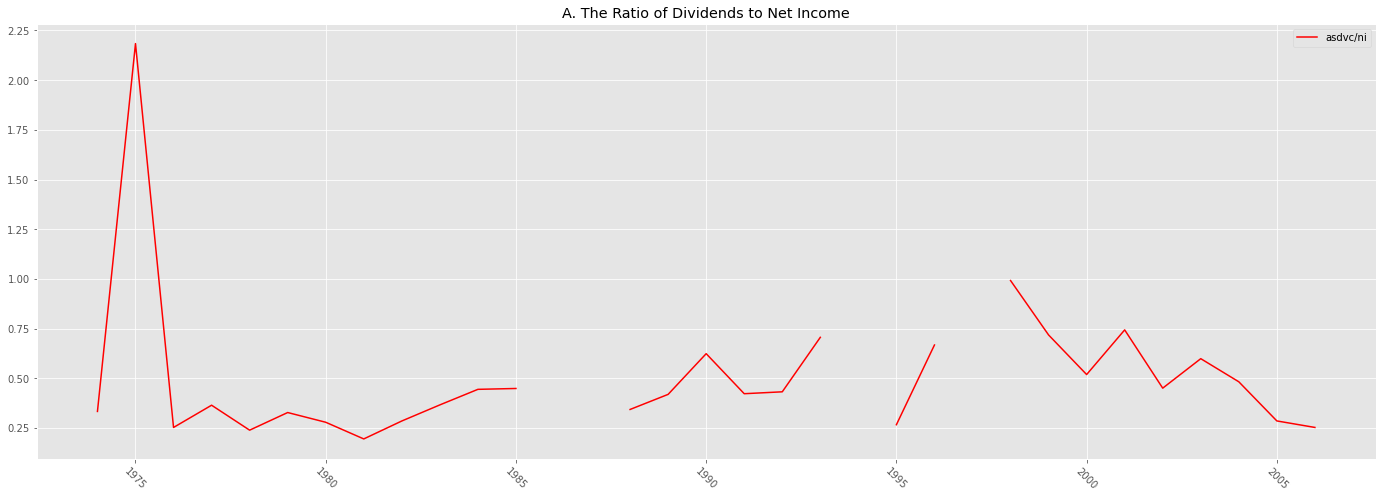

In [19]:
dfe[['asdvc/ni']].plot.line(
    title='A. The Ratio of Dividends to Net Income', 
    color = ("r") , xlabel = "", figsize=(24, 8), rot=-45)

B. Dividendsut (All as a Fraction of Toatal Assets)

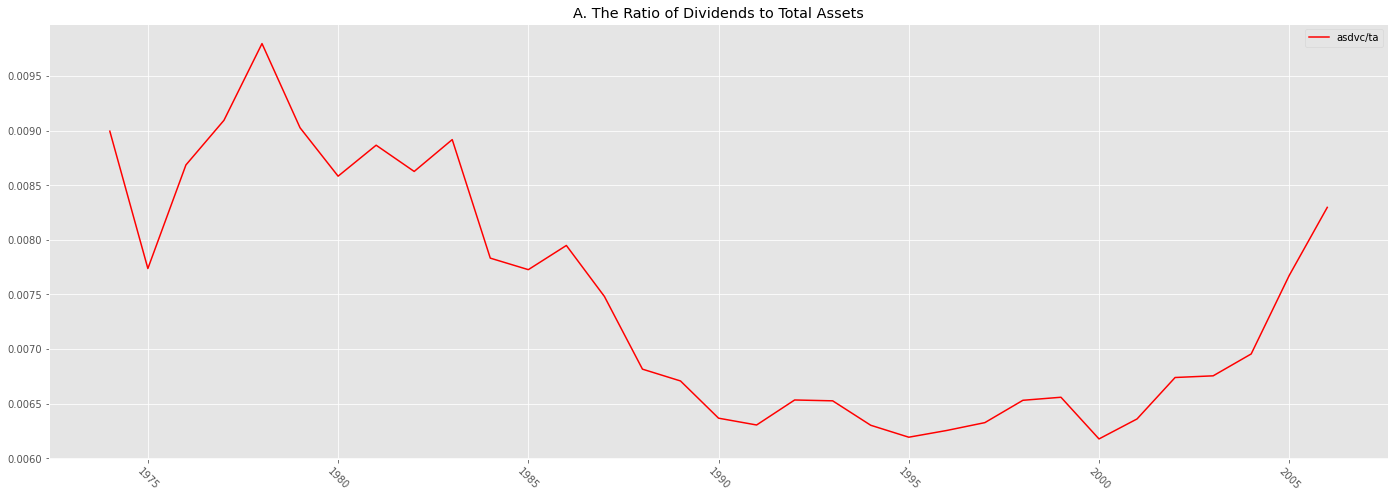

In [20]:
dfe[['asdvc/ta']].plot.line(
     title='A. The Ratio of Dividends to Total Assets', 
     color = ("r"), xlabel = "", figsize=(24, 8), rot=-45)

# Asset-Weighted Average

必要な項目を抽出し、まず、個々の企業、年度で対応するtaをかける

In [21]:
dfa = df[['ta', 'asdvc/ni', 'asdvc/ta']]

In [22]:
for i in range(1,len(dfa.columns)):
   dfa.iloc[:,i] = dfa.iloc[:,i] * df['ta']

各企業のデータを年度で合計し、各項目をtaの年度ごとの合計で割る

In [23]:
dfa = dfa.sum(level=0)

In [24]:
for i in range(len(dfa.columns)):
   dfa.iloc[:,i] = dfa.iloc[:,i] / dfa['ta']

In [28]:
dfa = dfa.sort_values('fy')
dfa

,ta,asdvc/ni,asdvc/ta
fy,,,
1974,1.0,3.425748e+06,70422.0
1975,1.0,9.483917e+06,62102.0
1976,1.0,6.068402e+05,72087.0
1977,1.0,7.437452e+06,87302.0
1978,1.0,1.345523e+07,145145.0
1979,1.0,7.151534e+06,156016.0
1980,1.0,6.064190e+06,172541.0
1981,1.0,7.906249e+06,212808.0
1982,1.0,9.655601e+06,226948.0


A. The Ratio of Total Payout to Net Income

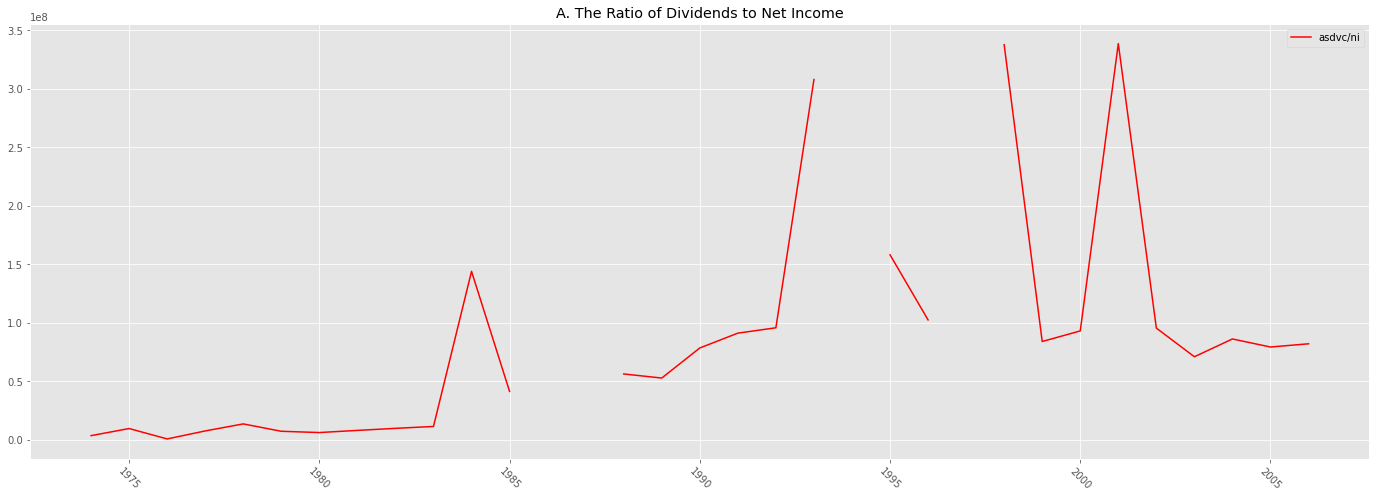

In [29]:
dfa[['asdvc/ni']].plot.line(
    title='A. The Ratio of Dividends to Net Income', 
    color = ("r") , xlabel = "", figsize=(24, 8), rot=-45)

B. Dividendsut (All as a Fraction of Toatal Assets)

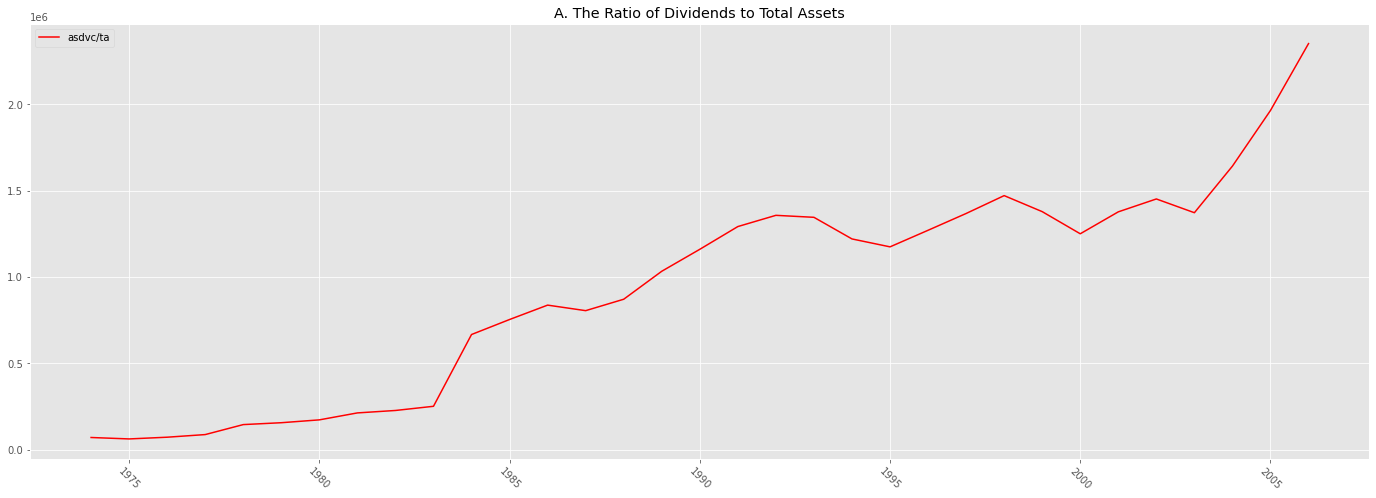

In [30]:
dfa[['asdvc/ta']].plot.line(
     title='A. The Ratio of Dividends to Total Assets', 
     color = ("r"), xlabel = "", figsize=(24, 8), rot=-45)

# 項目名略称一覧

日経会社コード　gvkey

株式コード　sc

決算期　fy

**利益処分計算書**

　普通株式配当金　asdvc　（配当したら正）

**P/L**

　利益　ni

**B/S**

　総資産　ta